# QuantumSim - The Bernstein-Vazirani algorithm
Author: Nico Kuijpers<br>
Date: January 3, 2025

The Bernstein-Vazirani algorithm was discovered by Ethan Bernstein and Umesh Vazirini. The algorithm determines whether a given input string is equal to a "secret" string. 

Given is a hidden Boolean function with a string of $n$ bits as input. It returns $1$ for only one unique $n$-bit string and $0$ otherwise.
In this notebook, two possible implementations in QuantumSim are given as well as some examples.

This notebook is based on the following notebooks from Qiskit, but uses QuantumSim instead of Qiskit:<br>
https://github.com/qiskit-community/qiskit-community-tutorials/blob/master/Coding_With_Qiskit/ep6_Bernstein-Vazirani_Algorithm.ipynb

https://github.com/qiskit-community/qiskit-community-tutorials/blob/master/algorithms/bernstein_vazirani.ipynb

The original publication of the Bernstein-Vazirani algorithm can be found here:<br>
Ethan Bernstein and Umesh Vazirini (1997) "Quantum Complexity Theory" SIAM Journal on Computing, Vol. 26, No. 5: 1411-1473<br>
https://doi.org/10.1137/S0097539796300921

See also Chapter 9 in:<br>
Robert S. Sutor, *Dancing with Qubits: From qubits to algorithms, embark on the quantum computing journey shaping our future*,
second edition, Packt Publishing, Birmingham, UK, ISBN 978-1-83763-675-4

In [1]:
from quantumsim import *

## Introduction
The Bernstein-Vazirani algorithm was one fo the earliest algorithms demonstrating the power of quantum computing.
The problem to be solved is to guess a "secret" bit string of length $n$ that may represent some integer value.

The algorithm uses an oracle function $f : \{0,1\}^n \rightarrow \{0,1\}$ that returns the dot product modulo $2$ of input string $x$ and secret string $s$.

For example, if $s = 1101$ (integer value $13$), then the function can be called $4$ times to find the secret string $1101$:

$f(1000) = s \cdot 1000 = 1101 \cdot 1000 = 1$<br>
$f(0100) = s \cdot 0100 = 1101 \cdot 0100 = 1$<br>
$f(0010) = s \cdot 0010 = 1101 \cdot 0010 = 0$<br>
$f(0001) = s \cdot 0001 = 1101 \cdot 0001 = 1$<br>


## Bernstein-Vazirani circuit as a variation of Deutsch-Josza
Below a function is defined to create a Bernstein-Vazirani circuit as described in this Qiskit notebook:

https://github.com/qiskit-community/qiskit-community-tutorials/blob/master/Coding_With_Qiskit/ep6_Bernstein-Vazirani_Algorithm.ipynb

The algorithm can be described as follows:
1. Initialize the first $n$ qubits in state $|0\rangle$, and the last qubit in state $|1\rangle$. 
2. Apply Hadamard operations to all qubits.
3. Build the oracle containing the secret number $s$. 
4. Measure the circuit in the Bell basis. This is done by applying Hadamard gates to all qubits before measuring.

The oracle is created as a function that computes $s \cdot x$ modulo $2$ for input $x$. 
This is done by applying a CNOT operation for each $1$ in the secret number. The CNOT has as control the corresponding qubit and as target the last qubit.

In [2]:
'''
Function to create a Bernstein-Vazirani circuit as a variation of Deutsch-Josza

Parameters:
    secret_number: secret number

Returns:
    Circuit: Quantum circuit of n+1 qubits for Bernstein-Vazirani circuit predicting secret number s.
'''
def create_bernstein_vazirani_circuit_deutsch_josza(secret_number:int):
    
    # Convert secret number s to a binary string
    secret_string = bin(secret_number)[2:]
    print(f"The secret number is {secret_number} and the secret string is {secret_string}")

    # Determine the length of the secret string
    n = len(secret_string)

    # Create a circuit of n+1 qubits.
    # Qubits 0 through n-1 are are the control qubits for the CNOT operations and qubit n is the target
    circuit = Circuit(n+1)

    # Bring the target qubit in state |1>
    circuit.pauli_x(n)

    # Bring all qubits in superposition by applying the Hadamard gate
    for q in range(n+1):
        circuit.hadamard(q)

    # Apply CNOT with control qubit q for each 1 in the secret string
    for q in range(n):
        if secret_string[q] == '1':
            circuit.cnot(q, n)

    # Apply Hadamard gates before measuring
    for q in range(n+1):
        circuit.hadamard(q)

    # Return the Bernstein-Vazirani circuit
    return circuit

### Example: secret number 1101 (integer value 13)
Below a Bernstein-Vazirani circuit of $5$ qubits is created with secret number $1101$ (integer value $13$). 
Upon measurement the first $4$ qubits will be in state $|1011\rangle$.

The secret number is 13 and the secret string is 1101


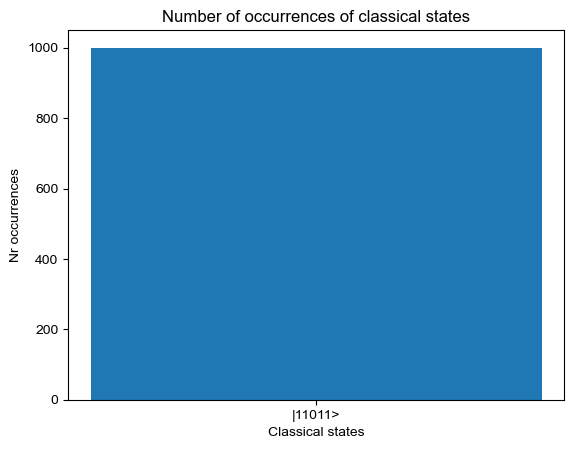

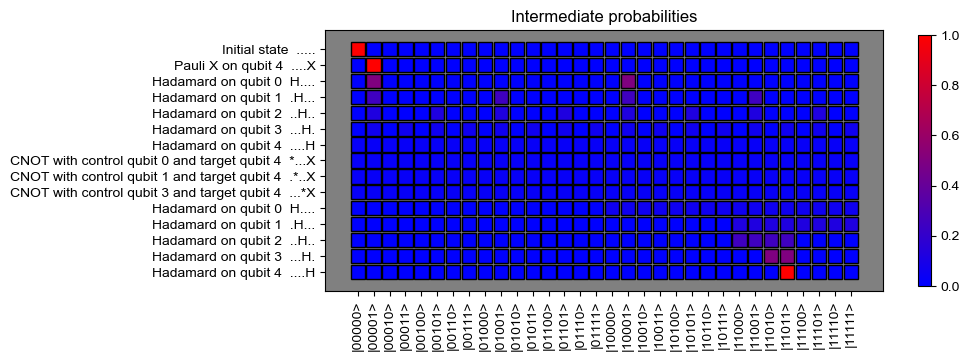

In [3]:
circuit = create_bernstein_vazirani_circuit_deutsch_josza(13)
result = QuantumUtil.measure_circuit(circuit, 1000)
QuantumUtil.histogram_of_classical_states(result)
QuantumUtil.show_all_probabilities(circuit)

### Example: secret number 11011 (integer value 27)
Below a Bernstein-Vazirani circuit of $6$ qubits is created with secret number $11011$ (integer value $27$). 
Upon measurement the first $5$ qubits will be in state $|11011\rangle$.

The secret number is 27 and the secret string is 11011


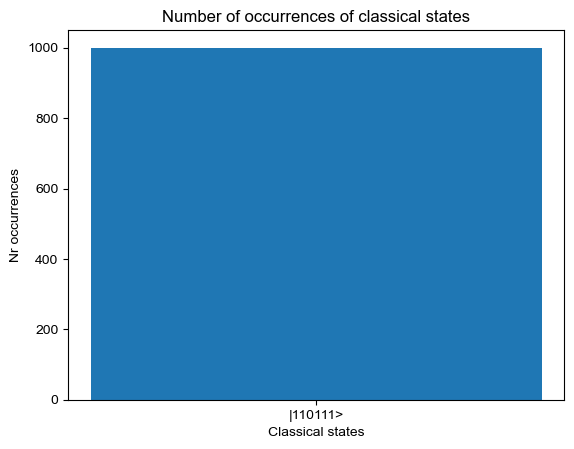

In [4]:
circuit = create_bernstein_vazirani_circuit_deutsch_josza(27)
result = QuantumUtil.measure_circuit(circuit, 1000)
QuantumUtil.histogram_of_classical_states(result)

## The Bernstein-Vazirani circuit
Below a function is defined to create a Bernstein-Vazirani circuit as described in this Qiskit notebook:

https://github.com/qiskit-community/qiskit-community-tutorials/blob/master/algorithms/bernstein_vazirani.ipynb

In this implementation, only $n$ qubits are used for a secret string of length $n$ and Pauli Z operations are used instead of CNOT.

In [5]:
'''
Function to create a Bernstein-Vazirani circuit.

Parameters:
    secret_number: secret number

Returns:
    Circuit: Quantum circuit of n qubits for Bernstein-Vazirani circuit predicting secret number s.
'''
def create_bernstein_vazirani_circuit(secret_number:int):
    
    # Convert secret number s to a binary string
    secret_string = bin(secret_number)[2:]
    print(f"The secret number is {secret_number} and the secret string is {secret_string}")

    # Determine the length of the secret string
    n = len(secret_string)

    # Create a circuit of n qubits
    circuit = Circuit(n)

    # Bring all qubits in superposition by applying the Hadamard gate
    for q in range(n):
        circuit.hadamard(q)

    # Apply a Pauli Z for each 1 in the secret string
    for q in range(n):
        if secret_string[q] == '1':
            circuit.pauli_z(q)
        else:
            circuit.identity(q)

    # Apply Hadamard gates before measuring
    for q in range(n):
        circuit.hadamard(q)

    # Return the Bernstein-Vazirani circuit
    return circuit

### Example: secret number 1101 (integer value 13)
Below a Bernstein-Vazirani circuit of $5$ qubits is created with secret number $1101$ (integer value $13$). 
Upon measurement the qubits will be in state $|1101\rangle$.

The secret number is 13 and the secret string is 1101


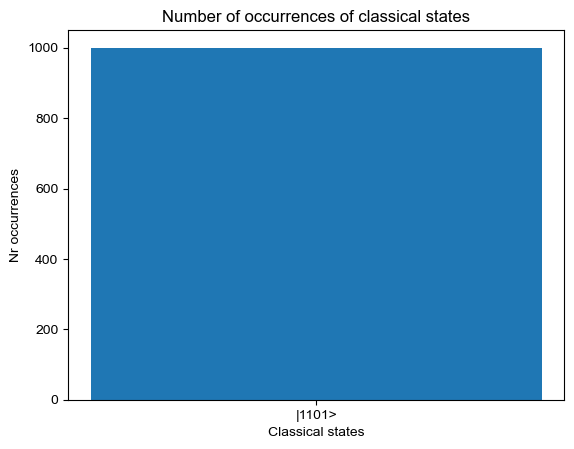

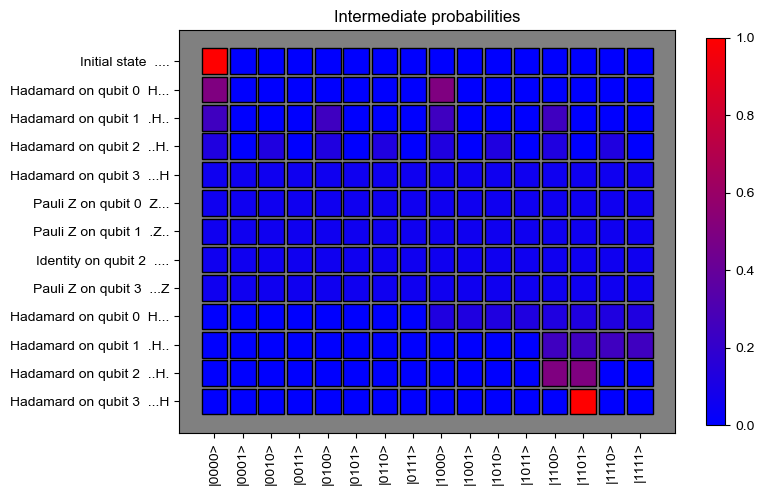

In [6]:
circuit = create_bernstein_vazirani_circuit(13)
result = QuantumUtil.measure_circuit(circuit, 1000)
QuantumUtil.histogram_of_classical_states(result)
QuantumUtil.show_all_probabilities(circuit)

### Example: secret number 11011 (integer value 27)
Below a Bernstein-Vazirani circuit of $5$ qubits is created with secret number $11011$ (integer value $27$). 
Upon measurement the qubits will be in state $|11011\rangle$.

The secret number is 27 and the secret string is 11011


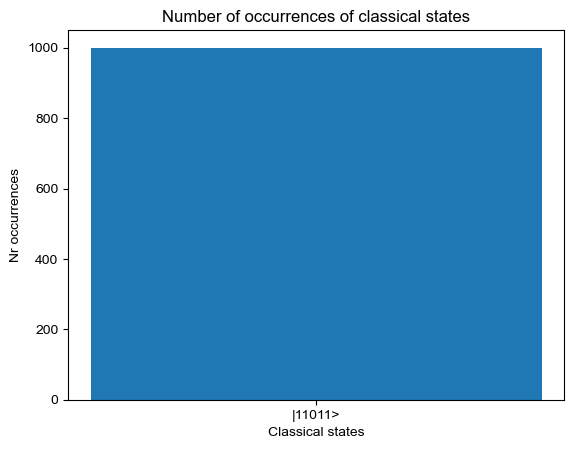

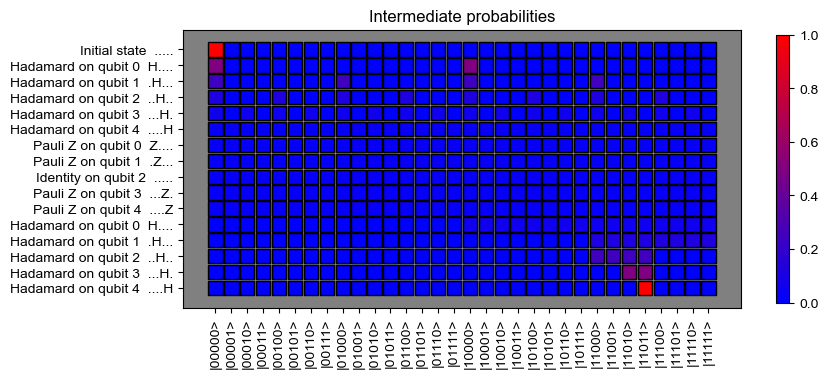

In [7]:
circuit = create_bernstein_vazirani_circuit(27)
result = QuantumUtil.measure_circuit(circuit, 1000)
QuantumUtil.histogram_of_classical_states(result)
QuantumUtil.show_all_probabilities(circuit)

## Example: random secret number

Below a Bernstein-Vazirani circuit is created with a random secret number between 1 and 1000.

The secret number is 906 and the secret string is 1110001010


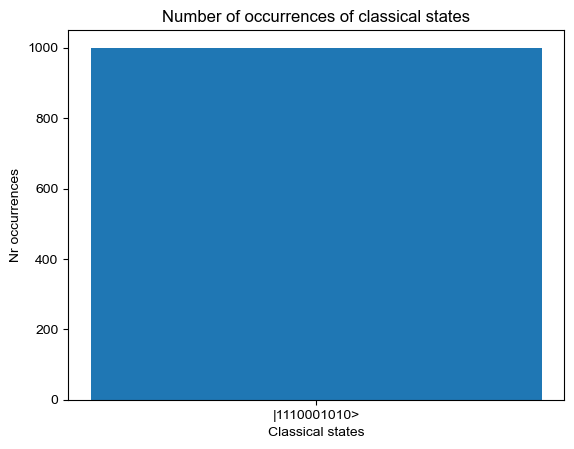

In [8]:
secret_number = np.random.randint(1000)
circuit = create_bernstein_vazirani_circuit(secret_number=secret_number)
result = QuantumUtil.measure_circuit(circuit, 1000)
QuantumUtil.histogram_of_classical_states(result)